In [1]:
f = open("HW2.fas", "r")
data = f.readlines()
len(data)

240

In [2]:
labels = []
sequences = []
for i in range(len(data)):
    if i%2 == 0:
        labels.append(data[i][1:-1])
    else:
        sequences.append(data[i][:-1])

In [3]:
def hamming_distance(seq1:str, seq2: str):
    output = 0;
    for i in range(len(seq1)):
        if seq1[i]!=seq2[i]:
            output +=1
    return output

In [4]:
import numpy as np
def get_hamming_distance(labels:list):
    output = []
    for seq1 in labels:
        temp = []
        for seq2 in labels:
            temp.append(hamming_distance(seq1, seq2))
        output.append(temp)
    return np.array(output)

In [5]:
distances = get_hamming_distance(sequences)

In [6]:
distances

array([[ 0,  1,  1, ..., 76, 74, 79],
       [ 1,  0,  2, ..., 77, 75, 80],
       [ 1,  2,  0, ..., 77, 75, 80],
       ...,
       [76, 77, 77, ...,  0,  4, 28],
       [74, 75, 75, ...,  4,  0, 28],
       [79, 80, 80, ..., 28, 28,  0]])

In [7]:
from sklearn.manifold import MDS

In [8]:
mds = MDS(random_state=0, dissimilarity='precomputed')
mds_matrix = mds.fit_transform(distances)

In [9]:
import matplotlib.pyplot as plt

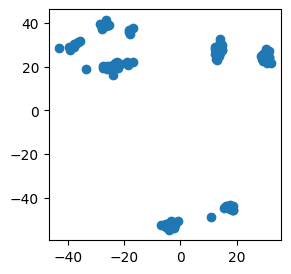

In [10]:
plt.figure(figsize = (3,3))
plt.scatter(mds_matrix[:,0], mds_matrix[:,1])
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=8).fit(mds_matrix)

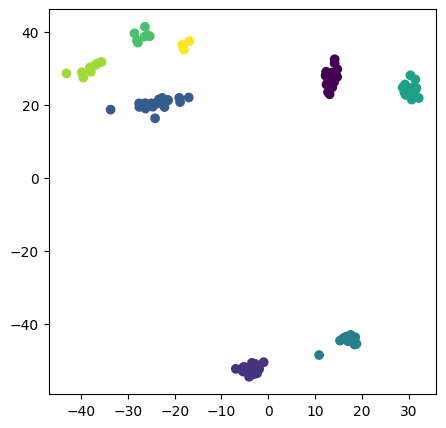

In [13]:
plt.figure(figsize=(5,5))
plt.scatter(mds_matrix[:,0], mds_matrix[:,1], c = model.labels_.astype(float))
plt.show()

In [82]:
pop = [2.68,13.03,6.17,3.4,2.3,8.91,12.13,12.6,15.88,19.87,7.29,9.08,3.36,6.82,13.57,15.93,19.21,4.53,2.39,6.6,5.71,16.22,5.56,9.21,5.9,20.06,3.16,3.06,5.48,4.59,3.11,18.98,3.35,2.43,11.81,12.34,8.39,4.08,2.47,3.2,8.76,21.06,15.8,16.52,12.97,20.23,19.91,3.97,6.29,8.15,4.44,7.6,3.92,4,21,3.83,3.38,7.34,22.26,20.46,3.98,3.81,16.85,22.99,4.44,22.43,10.89,9.54,4.7,3.91,3.08,7.01,4.33,5.4,18.48,20.69,15.47,6.72,7.82,5.87,3.33,13.82,11.96,22.08,2.85,9.17,29.18,3.67,8.43,3.07,9.75,16.74,2.92,5.8,4.13,20.5,7.96,5.6,2.83,4.04,20.45,15.37,12.56,14.17,3.47,2.68,6.9,4.81,3.02,21.3,3.92,11.08,7.67,4.95,14.03,4.78,16.02,7.11,2.93,6.04,3.9,5.69,19.82,15.54,5.82,2.68,3.3,17.43,3.68,4.44,3.62,9.01,4.64,7.88,8.05,6.18,18.72,20.92,21.77,1.19,17.58,15.53,2.65,6.18,2.87,3.63,3.1,20,8.27,3.7,10.89,17.05,21.23,4.51,2.27,6.09,2.53,18.49,10.63,13.1,10.72,3.03,6.55,20.59,18.73,4.46,3.63,3.08,11.82,4.06,3.57,6.83,12.11,8.86,15.72,8.35,5.38,2.38,17.03,1.9,16.85,18.48,14.71,5.87,4.39,8.18,6.91,19.82,2.8,2.27,4.52,]
len(pop)

191

In [83]:
import pandas as pd

In [84]:
len(countries)

250

In [198]:
data = pd.read_csv('hospital-beds-per-1000-people.csv')

In [199]:
data["population"] = pop

In [200]:
data.drop('Code', axis=1, inplace=True)

In [201]:
data.drop('Year', axis=1, inplace=True)

In [202]:
data

,Entity,"Hospital beds (per 1,000 people)",population
0,Afghanistan,0.39,2.68
1,Albania,2.89,13.03
2,Algeria,1.90,6.17
3,Andorra,2.50,3.40
4,Angola,0.80,2.30
...,...,...,...
186,Venezuela,0.87,6.91
187,Vietnam,2.60,19.82
188,Yemen,0.71,2.80
189,Zambia,2.00,2.27


In [203]:
death = "20.04 ,124.71 ,15.69 ,200.61 ,5.83 ,149.09 ,287.41 ,293.02 ,59.78 ,230.44 ,97.83 ,211.83 ,89.33 ,17.83 ,194.87 ,75.33 ,284.29 ,172.53 ,1.34 ,2.72 ,190.50 ,491.86 ,118.60 ,322.75 ,51.43 ,542.83 ,1.85 ,35.76 ,0.32 ,73.74 ,18.28 ,7.29 ,118.78 ,2.34 ,1.17 ,320.03 ,1.09 ,278.67 ,18.51 ,7.00 ,1.61 ,176.09 ,3.13 ,411.96 ,75.31 ,97.90 ,383.86 ,122.03 ,19.13 ,102.79 ,40.41 ,203.47 ,24.23 ,65.20 ,13.04 ,2.90 ,202.10 ,122.57 ,6.59 ,97.94 ,107.95 ,239.31 ,13.75 ,15.39 ,423.65 ,180.46 ,4.70 ,317.67 ,210.63 ,110.52 ,3.42 ,8.89 ,162.86 ,7.52 ,110.99 ,491.73 ,62.42 ,38.31 ,57.81 ,171.95 ,63.04 ,160.84 ,135.15 ,292.96 ,112.12 ,35.25 ,138.41 ,101.46 ,10.56 ,11.05,0.02 ,55.57 ,176.70 ,60.02 ,45.84, 10.42 ,317.78 ,156.43 ,32.96 ,5.81 ,93.68 ,225.50 ,342.36 ,180.36 ,5.09 ,14.02 ,112.38 ,56.98 ,3.66 ,182.54 ,29.10 ,21.40 ,80.68 ,258.33 ,27.24 ,294.06 ,160.53 ,65.00 ,442.95 ,44.10 ,7.11 ,160.57 ,41.25 ,135.93 ,42.12 ,3.70 ,1.29 ,1.53 ,457.62 ,75.59 ,90.63 ,13.86 ,33.32 ,196.93 ,7.47 ,274.67 ,656.85 ,57.47 ,310.72 ,245.48 ,23.67 ,348.42 ,260.07 ,11.32 ,86.48 ,214.02 ,104.55 ,14.79 ,347.69 ,35.13 ,26.87 ,11.75 ,194.70 ,171.85 ,1.58 ,27.67 ,376.45 ,328.29 ,23.44 ,8.56 ,172.29 ,1.23 ,244.21 ,78.28 ,11.31 ,236.09 ,200.26 ,161.87 ,18.07 ,1.31 ,1.41 ,46.95 ,10.47 ,3.44 ,11.35 ,300.61 ,247.48 ,119.92 ,321.61 ,7.94 ,267.62 ,23.71 ,305.79 ,215.47 ,4.89 ,4.78 ,20.45 ,12 ,7.23 ,21.85 ,37.69"
death = death.split(',')

In [204]:
rates = []
for item in death:
    item = float(item)
    rates.append(item)

In [205]:
len(rates)

191

In [206]:
data['death'] = rates

In [207]:
y = data.death.to_numpy()


In [208]:
features = data.drop(['death','Entity'], axis=1).to_numpy()

In [215]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import accuracy_score
model = lr()
kf = KFold(n_splits=5)
count = 1
for train_index, test_index in kf.split(features):
    X_train, X_test = features[train_index], features[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    model = model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    index = 0
    err = 0
    for item in predictions:
        if item != Y_test[index]:
            err +=1
        index +=1
    print(f'Accuracy:{round((err/index)*100, 2)}%')
    


[ 95.1468836  126.4940189  107.98370493 103.90680013  95.70115767
 117.39754095 131.6431816  129.99629424 136.01479222 156.48013455
 120.37933214 118.01075612 101.23583889 105.64680667 138.15278717
 159.87873268 149.27994257 101.44030899  94.8804016  123.8852561
 106.42436393 128.10001581 112.0400636  114.35584733 108.0332378
 141.87950695 120.1980884   96.01986139 102.68824345 101.09703145
  99.18865187 138.37358152 102.43711831 103.46426279 115.33883761
 151.15419286 113.42892001 111.55893558  99.16887657] [2.0040e+01 1.2471e+02 1.5690e+01 2.0061e+02 5.8300e+00 1.4909e+02
 2.8741e+02 2.9302e+02 5.9780e+01 2.3044e+02 9.7830e+01 2.1183e+02
 8.9330e+01 1.7830e+01 1.9487e+02 7.5330e+01 2.8429e+02 1.7253e+02
 1.3400e+00 2.7200e+00 1.9050e+02 4.9186e+02 1.1860e+02 3.2275e+02
 5.1430e+01 5.4283e+02 1.8500e+00 3.5760e+01 3.2000e-01 7.3740e+01
 1.8280e+01 7.2900e+00 1.1878e+02 2.3400e+00 1.1700e+00 3.2003e+02
 1.0900e+00 2.7867e+02 1.8510e+01]
[ 94.49102699 121.10269641 179.37486102 155.19604